# Name: Sangramjit Hazarika
# Registration Number: 19BCE1371 - DA-2 (NLP)

# Sentiment Analysis (n-gram)
# n-gram

In [248]:
import nltk
import numpy as np
import seaborn as sns

In [249]:
import pandas as pd

In [250]:
df = pd.read_csv("data.csv")

In [251]:
df.head()

,review,rating
0,It was nice produt. I like it's design a lot. ...,5
1,awesome sound....very pretty to see this nd th...,5
2,awesome sound quality. pros 7-8 hrs of battery...,4
3,I think it is such a good product not only as ...,5
4,awesome bass sound quality very good bettary l...,5


In [252]:
df.tail()

,review,rating
9971,GoodREAD MORE,5
9972,Everything is amazimg but the built is very li...,5
9973,GoodREAD MORE,5
9974,Best headphone i have ever used....READ MORE,5
9975,NiceREAD MORE,5


In [253]:
df.shape

(9976, 2)

In [254]:
df.isnull().sum()

review    0
rating    0
dtype: int64

In [255]:
df.isnull().sum().sort_values(ascending=False)

review    0
rating    0
dtype: int64

In [256]:
df.dropna(inplace=True)

In [257]:
# Unique ratings
df["rating"].value_counts()

5    5726
4    2365
3     884
1     691
2     310
Name: rating, dtype: int64

In [258]:
df[df["rating"]< 3]

,review,rating
13,Sound quality is good. But cannot wear it for ...,1
14,Reson for 1 star : Sounds for alerts for conne...,1
76,Not good at all only because of one reason the...,1
80,I was really excited about the headphones at f...,1
83,"in Bluetooth connection sound ,bass, all is go...",2
...,...,...
9923,AverageREAD MORE,2
9937,"Connectivity is not good, sound breaks midway,...",1
9938,Wastage of moneyREAD MORE,1
9952,I can't wear it more than 10 minutes.It's too ...,1


In [259]:
#df = df[df["rating"]< 3]

In [260]:
df["rating"].value_counts()

5    5726
4    2365
3     884
1     691
2     310
Name: rating, dtype: int64

In [261]:
df["Positively Rated"]= np.where(df["rating"] > 3, 1, 0)

In [262]:
df.head()

,review,rating,Positively Rated
0,It was nice produt. I like it's design a lot. ...,5,1
1,awesome sound....very pretty to see this nd th...,5,1
2,awesome sound quality. pros 7-8 hrs of battery...,4,1
3,I think it is such a good product not only as ...,5,1
4,awesome bass sound quality very good bettary l...,5,1


In [263]:
df['Positively Rated'].value_counts()

1    8091
0    1885
Name: Positively Rated, dtype: int64

/Users/sangramjithazarika/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Positively Rated', ylabel='count'>

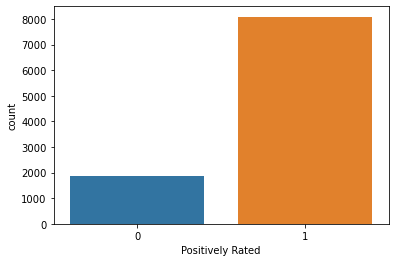

In [264]:
sns.countplot(df["Positively Rated"])

In [265]:
df['Positively Rated'].describe()

count    9976.000000
mean        0.811047
std         0.391491
min         0.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Positively Rated, dtype: float64

In [266]:
from sklearn.model_selection import train_test_split

In [267]:
X_train, X_test, y_train, y_test = train_test_split(df["review"], df["Positively Rated"],
                                                   random_state=0)

In [268]:
print(X_train)

9800                                        GoodREAD MORE
8449                                   It's niceREAD MORE
8929                                          GdREAD MORE
1977    Sound Quality, Bass, Design everything is alri...
916     Yeah it's a good Piece I like itIt have a good...
                              ...                        
9225    IT IS VERY SUPER SOUNDBUT PAIN FULLBUT SUPERRE...
4859    Pros:Very good Quality. Worth for money. Cons ...
3264                                        NiceREAD MORE
9845                                     AverageREAD MORE
2732    Ya it's a pretty good product.you can buy this...
Name: review, Length: 7482, dtype: object


In [269]:
X_train[0]

"It was nice produt. I like it's design a lot.  It's easy to carry. And.   Looked stylish.READ MORE"

In [270]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer(min_df= 5, ngram_range=(1,2)).fit(X_train)

In [271]:
len(vect.get_feature_names())

4657

In [272]:
X_train_vectorized = vect.transform(X_train)

In [273]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

/Users/sangramjithazarika/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [274]:
# Save predictions
predictions = model.predict(vect.transform(X_test))

In [275]:
print(predictions)

[1 1 1 ... 1 0 0]


In [276]:
print(y_test)

5486    1
8915    1
8944    1
1103    1
4957    1
       ..
640     1
4968    0
2462    1
3170    1
2747    0
Name: Positively Rated, Length: 2494, dtype: int64


In [277]:
# AUC
from sklearn.metrics import roc_auc_score
print("AUC score is", roc_auc_score(y_test, predictions))

AUC score is 0.7888323605874352


In [278]:
feature_names = np.array(vect.get_feature_names())
sorted_coef_index = model.coef_[0].argsort()

In [279]:
print("Negative words", feature_names[sorted_coef_index[:10]])

Negative words ['worst' 'not' 'bad' 'damage' 'stopped' 'not goodread' 'very badread'
 'just awesome' 'poor' 'breaking']


In [280]:
print("Positive words", feature_names[sorted_coef_index[:-11:-1]])

Positive words ['not badread' 'amazing' 'not bad' 'awesome' 'nice product' 'very good'
 'clear' 'loved' 'excellent' 'great']
